# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

    Для анализа мы получили архив объявлений о продаже кварти в Санкт-Петербурге и близлежащих населенных пунктах примерно за 4,5 года (конец 2014 г. - начало 2019 г.).
    
    Нашей целью является:
    1. осуществить предобработку данных; 
    2. проанализировать имеющиеся данные; 
    3. выявить имеющиеся особенности и интересные зависимости, которые существуют на рынке недвижимости;
    4. описать выводы по каждому изученному параметру 
    5. сделать общий вывод. 
    
    Данные из файла делятся на два типа:
    1. Добавленные пользователем
    2. Картографические
    
    Описание данных:
        airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
        balcony — число балконов
        ceiling_height — высота потолков (м)
        cityCenters_nearest — расстояние до центра города (м)
        days_exposition — сколько дней было размещено объявление (от публикации до снятия)
        first_day_exposition — дата публикации
        floor — этаж
        floors_total — всего этажей в доме
        is_apartment — апартаменты (булев тип)
        kitchen_area — площадь кухни в квадратных метрах (м²)
        last_price — цена на момент снятия с публикации
        living_area — жилая площадь в квадратных метрах (м²)
        locality_name — название населённого пункта
        open_plan — свободная планировка (булев тип)
        parks_around3000 — число парков в радиусе 3 км
        parks_nearest — расстояние до ближайшего парка (м)
        ponds_around3000 — число водоёмов в радиусе 3 км
        ponds_nearest — расстояние до ближайшего водоёма (м)
        rooms — число комнат
        studio — квартира-студия (булев тип)
        total_area — общая площадь квартиры в квадратных метрах (м²)
        total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


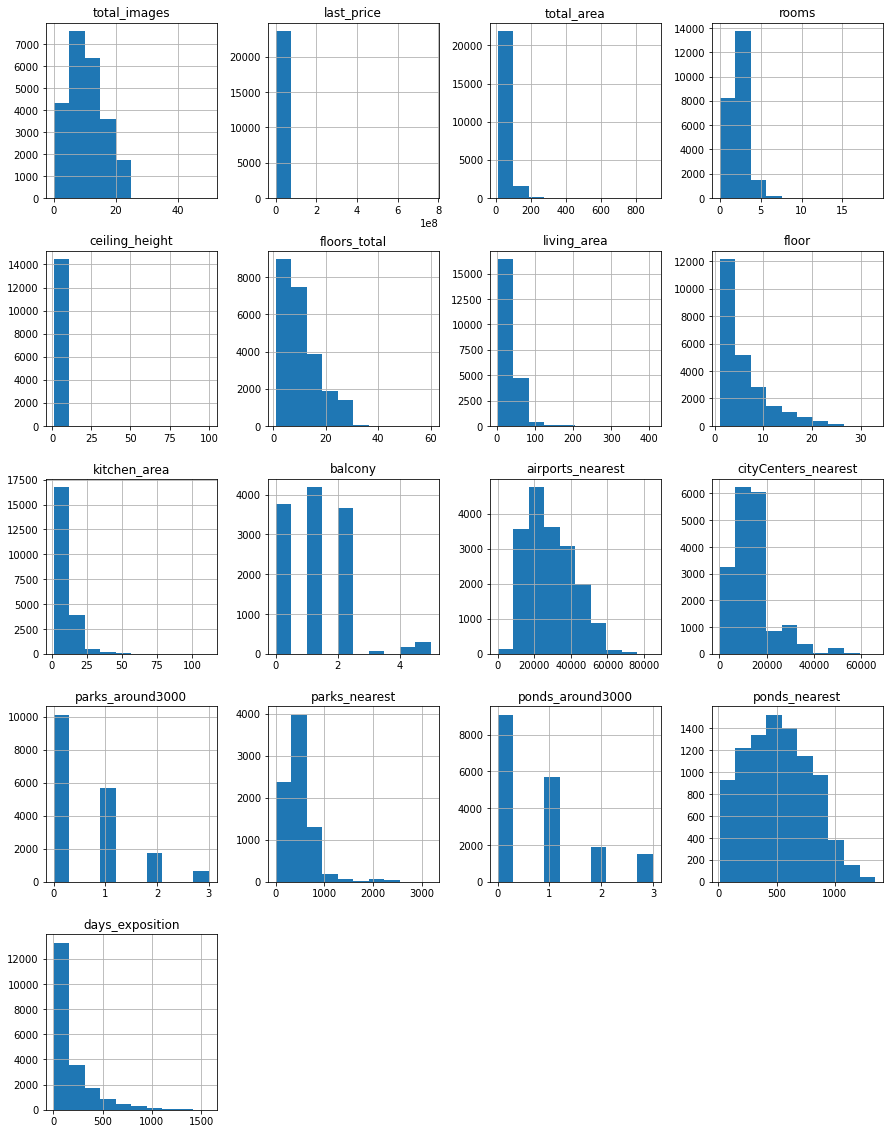

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #импортируем библиотеки
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #открываем файл с информацией о недвижимости
print(data.info()) #смотрим инфо о датафрейме
display(data.head(15))
data.hist(figsize=(15, 20)) #строим общую гистограмму длявсех числовых столбцов
display(data.describe()) #формируем описание данных датафрейма

По результатам формирования информативных данных о таблице видим, что таблица содержит 22 столбца, во многих столбцах есть пропуски, также часть наименований столбцов содержит стилистические ошибки.
Для себя определили следующие столбцы с пропусками, как требующие обработки, поскольку они необходимы для поиска ответа на поставленные задачи:
- ceiling_height
- floors_total

Видим, что по каждому объявлению есть информация о стоимости, площади, дате объявления, количестве комнат. В целом имеем достаточное количество данных для проведения анализа.

Что смущает: максимальная высота потолков, а также максимальная площадь жилплощади, максимальное количество комнат в жилплощади и несоответствие этих данных максимальной стоимости жилплощади.

### Предобработка данных

In [2]:
data.columns = data.columns.str.lower()
print(data.columns) #скорректируем наименования стоолбцов


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [3]:
print(data.head(15)) #сформируем первые 15 строк таблицы, чтобы визуально оценить, как выглядит формат предоставления данных
print(data.isna().sum())#посмотрим, в каких столбцах есть пропуски
#заменим некоторые пропуски в столбцах с количественными значениями, которые не должны повлиять на 
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

Данные в столбцах, где содержится информация о количестве балконов, заменим на 0, т.к., вероятнее всего, они не указаны по причине их отсуствия в квартире.
Информацию о количестве парков и прудов также заменим на 0, т.к., скорее всего, ее не указали по причине их отсутствия.

In [4]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Изменим тип данных в столбце с информацией об апартаментах согласно типу данных, указанному в описании данных

In [5]:
print(data['locality_name'].value_counts())

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
посёлок Алексеевка                                             1
поселок Семиозерье                                             1
деревня Кисельня                                               1
посёлок Коробицыно                                             1
садоводческое некоммерческое товарищество Лесная Поляна        1
Name: locality_name, Length: 364, dtype: int64


In [6]:
print(data['locality_name'].unique()) #сформируем список уникальных значений в столбце 'locality_name'

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [7]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') #заменим в значениях столбца все буквы 'ё' на 'е'
print(data['locality_name'].unique()) #проверим, что замена прошла корректно

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

In [8]:
data['locality_name'] = data['locality_name'].str.replace('поселок','') #уберем из значений "поселок"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' 'городской  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' 'деревня Кудрово' 'Коммунар'
 'Колпино' ' городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино' ' Металлострой'
 ' городского типа Лебяжье' ' городского типа Сиверский' ' Молодцово'
 ' городского типа Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' 'деревня Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп'
 'Приозерск' 'Сестрорецк' 'деревня Куттузи' ' Аннино'
 ' городского типа Ефимовский' ' Плодовое' 'деревня Заклинье' ' Торковичи'
 ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой' 'деревня Старая'
 'деревня Лесколово' ' Новый Свет' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'деревня Оржицы' 'деревня Кальтино' 'Кудрово' ' Романовка' ' Бугры'
 ' городского типа Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное'
 'село Павлово' ' Оредеж

In [9]:
data['locality_name'] = data['locality_name'].str.replace('деревня','') #уберем из значений "деревня"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' 'городской  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' ' городского типа Красный Бор' 'Гатчина' ' Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' ' Новое Девяткино' ' Металлострой'
 ' городского типа Лебяжье' ' городского типа Сиверский' ' Молодцово'
 ' городского типа Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' ' Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' ' Куттузи' ' Аннино' ' городского типа Ефимовский'
 ' Плодовое' ' Заклинье' ' Торковичи' ' Первомайское' 'Красное Село'
 ' Понтонный' 'Сясьстрой' ' Старая' ' Лесколово' ' Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' ' Оржицы' ' Кальтино' 'Кудрово' ' Романовка'
 ' Бугры' ' городского типа Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное'
 'село Павлово' ' Оредеж' 'село Копорье' ' Молодежное' 'Тихвин' ' Победа'
 ' Нурма' ' городског

In [10]:
data['locality_name'] = data['locality_name'].str.replace('городского типа','') #уберем из значений "городского типа"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' 'городской  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' '  Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' '  Лебяжье' '  Сиверский'
 ' Молодцово' '  Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' ' Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' ' Куттузи' ' Аннино' '  Ефимовский' ' Плодовое' ' Заклинье'
 ' Торковичи' ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой'
 ' Старая' ' Лесколово' ' Новый Свет' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 ' Оржицы' ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' '  Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'село Павлово' ' Оредеж' 'село Копорье'
 ' Молодежное' 'Тихвин' ' Победа' ' Нурма' '  Синявино' 'Тосно'
 ' Стрельна' 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево'
 ' Терволов

In [11]:
data['locality_name'] = data['locality_name'].str.replace('городской','') #уберем из значений "городской"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' '  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' '  Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' '  Лебяжье' '  Сиверский'
 ' Молодцово' '  Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' ' Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' ' Куттузи' ' Аннино' '  Ефимовский' ' Плодовое' ' Заклинье'
 ' Торковичи' ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой'
 ' Старая' ' Лесколово' ' Новый Свет' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 ' Оржицы' ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' '  Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'село Павлово' ' Оредеж' 'село Копорье'
 ' Молодежное' 'Тихвин' ' Победа' ' Нурма' '  Синявино' 'Тосно'
 ' Стрельна' 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево'
 ' Терволово' '  Сов

In [12]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный','') #уберем из значений "коттеджный"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' '  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' '  Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' '  Лебяжье' '  Сиверский'
 ' Молодцово' '  Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' ' Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' ' Куттузи' ' Аннино' '  Ефимовский' ' Плодовое' ' Заклинье'
 ' Торковичи' ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой'
 ' Старая' ' Лесколово' ' Новый Свет' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 ' Оржицы' ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' '  Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'село Павлово' ' Оредеж' 'село Копорье'
 ' Молодежное' 'Тихвин' ' Победа' ' Нурма' '  Синявино' 'Тосно'
 ' Стрельна' 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево'
 ' Терволово' '  Сов

In [13]:
data['locality_name'] = data['locality_name'].str.replace('село','') #уберем из значений"село"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' '  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' '  Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' '  Лебяжье' '  Сиверский'
 ' Молодцово' '  Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' ' Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' ' Куттузи' ' Аннино' '  Ефимовский' ' Плодовое' ' Заклинье'
 ' Торковичи' ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой'
 ' Старая' ' Лесколово' ' Новый Свет' 'Сланцы' ' Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 ' Оржицы' ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' '  Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' ' Павлово' ' Оредеж' ' Копорье'
 ' Молодежное' 'Тихвин' ' Победа' ' Нурма' '  Синявино' 'Тосно'
 ' Стрельна' 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево'
 ' Терволово' '  Советский' 'Под

In [14]:
data['locality_name'] = data['locality_name'].str.replace('станции','') #уберем из значений "станции"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' '  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' '  Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' '  Лебяжье' '  Сиверский'
 ' Молодцово' '  Кузьмоловский' 'садовое товарищество Новая Ропша'
 'Павловск' ' Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' ' Куттузи' ' Аннино' '  Ефимовский' ' Плодовое' ' Заклинье'
 ' Торковичи' ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой'
 ' Старая' ' Лесколово' ' Новый Свет' 'Сланцы' ' Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 ' Оржицы' ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' '  Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' ' Павлово' ' Оредеж' ' Копорье'
 ' Молодежное' 'Тихвин' ' Победа' ' Нурма' '  Синявино' 'Тосно'
 ' Стрельна' 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево'
 ' Терволово' '  Советский' 'Под

In [15]:
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','') #уберем из значений "садовое товарищество"
print(data['locality_name'].unique())

['Санкт-Петербург' ' Шушары' '  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' '  Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' '  Лебяжье' '  Сиверский'
 ' Молодцово' '  Кузьмоловский' ' Новая Ропша' 'Павловск' ' Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' ' Куттузи'
 ' Аннино' '  Ефимовский' ' Плодовое' ' Заклинье' ' Торковичи'
 ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой' ' Старая'
 ' Лесколово' ' Новый Свет' 'Сланцы' ' Путилово' 'Ивангород' 'Мурино'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор' ' Оржицы'
 ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' '  Рощино' 'Кириши' 'Луга'
 'Волосово' 'Отрадное' ' Павлово' ' Оредеж' ' Копорье' ' Молодежное'
 'Тихвин' ' Победа' ' Нурма' '  Синявино' 'Тосно' ' Стрельна'
 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево' ' Терволово'
 '  Советский' 'Подпорожье' ' Петровско

In [16]:
data['locality_name'] = data['locality_name'].str.replace(' ','') #уберем в значениях столбца все пробелы
print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'КрасныйБор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'НовоеДевяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'НоваяРопша' 'Павловск' 'Пикколово' 'Всеволожск' 'Волхов'
 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино' 'Ефимовский'
 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское' 'КрасноеСело'
 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'НовыйСвет' 'Сланцы'
 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'СосновыйБор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' 'Севаст

In [17]:
data['locality_name'] = data['locality_name'].str.lower() 
print(data['locality_name'].unique())

['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красныйбор' 'гатчина' 'федоровское' 'выборг' 'кронштадт' 'кировск'
 'новоедевяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'новаяропша' 'павловск' 'пикколово' 'всеволожск' 'волхов'
 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи' 'аннино' 'ефимовский'
 'плодовое' 'заклинье' 'торковичи' 'первомайское' 'красноесело'
 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новыйсвет' 'сланцы'
 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновыйбор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодежное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалево' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'
 'вартемяги' 'тельмана' 'севаст

In [18]:
print(data['locality_name'].value_counts())

санкт-петербург          15721
мурино                     590
кудрово                    472
шушары                     440
всеволожск                 398
                         ...  
пижма                        1
большоерейзино               1
платформа69-йкилометр        1
плоское                      1
почап                        1
Name: locality_name, Length: 307, dtype: int64


In [19]:
print(data[data['locality_name'].isna()]) #сформируем датафрейм с пропущенными значениями в столбце 'locality_name'

       total_images  last_price  total_area first_day_exposition  rooms  \
1097              3   8600000.0       81.70  2016-04-15T00:00:00      3   
2033              6   5398000.0       80.00  2017-05-30T00:00:00      3   
2603             20   3351765.0       42.70  2015-09-20T00:00:00      1   
2632              2   5130593.0       62.40  2015-10-11T00:00:00      2   
3574             10   4200000.0       46.50  2016-05-28T00:00:00      2   
4151             17  17600000.0       89.50  2014-12-09T00:00:00      2   
4189              7   9200000.0       80.00  2015-12-10T00:00:00      3   
4670              1   5500000.0       83.00  2015-08-14T00:00:00      3   
5343             19  13540000.0       85.50  2016-01-20T00:00:00      3   
5707              7   3700000.0       30.00  2016-04-29T00:00:00      1   
6765             20   4895892.0       60.70  2015-03-12T00:00:00      2   
7114              5   4250000.0       56.00  2016-03-16T00:00:00      3   
7330              8   510

Пропущенных значений всего 49 - не слишком значительное число
Также видим, что данные объекты недвижимости расположены в большинстве своем до 17 км. от центра города, и лишь некоторые из них в пределах 30-40 км. от центра города.
Протяженность Санкт-Петербурга с северо-запада на юго-восток составляет 90 км., т.е. в среднем можно предположить, что объект, расположенный в 45 км. от центра города находится в пределах города.
В связи с этим, предлагаю заменить пропущенные значения в данном столбце на 'Санкт-Петербург'

In [20]:
data['locality_name'] = data['locality_name'].fillna('санкт-петербург') #заменим пропущенные значения NaN на 'Санкт-Петербург'

In [21]:
print(data['locality_name'].isna().sum()) #проверим отсутсвие пропущенных значений

0


Проработали столбец 'locality_name', а именно - удалили дубли, заменили пропущенные значения

In [22]:
display(data['last_price'].describe()) #посмотрим описание столбца 'last_price'

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Видим, что средняя стоимость квартиры составляет 6,5 млн., также видим аномальные значения - это минимальная стоимость 12 тысяч рублей и максимальная стоимость - 763 млн.рублей. 
Посмотрим количество объявлений со стоимостью менее 300 тыс. рублей и более 500 млн. рублей.

In [23]:
display(data[data['last_price'] < 300000]) #выведем на экран таблицу со значениями стоимости объекта менее 300 тысяч

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,True,...,40.5,0,санкт-петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


In [24]:
display(data[data['last_price'] > 500000000]) #выведем на экран таблицу со значениями стоимости объекта более 500 млн

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,True,...,NaN,2,санкт-петербург,25108.0,3956.0,1,530.0,3,756.0,33.0


По одной записи в каждом значении, не понятно, насколько они реальны. Думаю, лучше удалить.

count    2.369700e+04
mean     6.509902e+06
std      9.715219e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

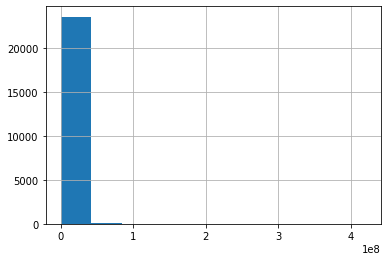

In [25]:
data = data[(data['last_price'] > 300000) & (data['last_price'] < 500000000)] #удалим строки с аномальными значениями в стоимости объекта
display(data['last_price'].describe())
pd.Series(data['last_price'].hist())

Проведем категоризацию недвижимости. Напишем функцию.

In [26]:
def real_estate_category(row):
    apartment = row['is_apartment']
    price = row['last_price']
    
    if apartment == False:
        if price >= 30000000:
            return 'Люкс'
    if apartment == False:
        if price < 30000000:
            return 'Стандартное жилье'
    return 'Апартаменты'

In [27]:
data['real_estate_category'] =  data.apply(real_estate_category, axis=1) #применим функцию к таблице, добавим столбец с категорией жилья
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Апартаменты
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,True,...,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Апартаменты
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Апартаменты
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Апартаменты
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Апартаменты
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,True,...,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0,Апартаменты
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,True,...,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,Апартаменты
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,True,...,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,Апартаменты
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,True,...,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0,Апартаменты
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,True,...,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,Апартаменты


Обработали столбец 'last_price', а именно проверили и удалили артефакты.
Добавили в таблицу информацию, которая содержит в себе категорию недвижимости.
Ранее проверяли пропуски во всей таблице, в данном столбце они отсутствуют.

In [28]:
display(data['ceiling_height'].describe()) #посмотрим описание столбца с высотой потолков

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим подозрительные значения: минимальное - 1 м. и максимальное - 100 м.
Посмотрим их более подробно.

In [29]:
display(data[data['ceiling_height'] > 20]) #выведем на экран таблицу со значениями в колонке высота потолка более 20 м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0,Стандартное жилье
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,True,...,0,волхов,NaN,NaN,0,NaN,0,NaN,NaN,Апартаменты
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,True,...,1,санкт-петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,Апартаменты
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,True,...,2,мурино,NaN,NaN,0,NaN,0,NaN,28.0,Апартаменты
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,0,санкт-петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,Апартаменты
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,True,...,2,мины,NaN,NaN,0,NaN,0,NaN,540.0,Апартаменты
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,True,...,2,санкт-петербург,28981.0,10912.0,1,305.0,0,NaN,267.0,Апартаменты
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,True,...,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,Апартаменты
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,True,...,0,кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN,Апартаменты
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,True,...,0,санкт-петербург,11647.0,13581.0,0,NaN,0,NaN,NaN,Апартаменты


Предположим, что данные значения должны быть в 10 раз меньше

In [30]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data['ceiling_height']/10 #поделим значения больше 20 на 10

In [31]:
print(data['ceiling_height'].isna().sum()) #проверим пропуски в данном столбце

9194


In [32]:
data.groupby(by='real_estate_category')['ceiling_height'].median() #проверим медиану в разрезе категорий

real_estate_category
Апартаменты          2.650
Люкс                 3.025
Стандартное жилье    2.700
Name: ceiling_height, dtype: float64

In [33]:
for d in data['real_estate_category'].unique():
    data.loc[(data['real_estate_category'] == d) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['real_estate_category'] == d), 'ceiling_height'].median() #заполним пропуски в колонке с высотой потолков медианным значением в разрезе категорий жилья

In [34]:
print(data['ceiling_height'].isna().sum()) #убедимся, что пропуски в данном столбце отсутствуют

0


Обработали данные в столбце 'ceiling_height', исправили аномальные значения и заполнили пропуски медианными значениями.

In [35]:
#согласно данным в интернете самое многоэтажное здание в Санкт-Петербурге имеет 37 этажей
display(data.loc[data['floors_total'] > 37]) #cформируем строки с объявлениями, где объекты недвижимости находятся в домах с бОльшей этажностью

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,True,...,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,Апартаменты
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,True,...,0,санкт-петербург,20728.0,12978.0,1,793.0,0,NaN,45.0,Апартаменты


In [36]:
data = data.loc[data['floors_total'] < 37] #удаляем данные строки

In [37]:
display(data['floors_total'].isna().sum()) #проверим пропущенные значения в столбце 'floors_total'

0

Видим, что после удаления ряда строк в процессе работы, строк с пропущенными значениями в столбце 'floors_total' не осталось.
Проверим, нет ли несоответствий в этажах, на которых расположены объекты недвижимости, и этажности домов.

In [38]:
display(data.loc[data['floors_total'] < data['floor']]) #выведем на экран строки, где значение этажности дома меньше, чем этаж, на котором расположена квартира

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category


Убедились, что таких несоответствий нет.

In [39]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') #отформатируем дату размещения объявления в единый формат
display(data['first_day_exposition'].min(), data['first_day_exposition'].max()) #проверим дату первого и последнего объявления

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

Отформатировали даты размещения объявлений, аномальных значений не выявлено, оставляем как есть.

Итоги предобработки данных:
Переименовали колонки в соответствии со стилистическими правилами.
Проверили и исправили пропуски в таких столбцах, как 'locality_name', 'ceiling_height', 'floors_total', 'balkony', 'parks_around3000', 'ponds_around3000'. Данные пропуски могли возникнуть по причине незаполнения информации в момент размещения объявления либо могли возникнуть ошибки при выгрузке данных, которые повлекли за собой удаление информации.
Скорректировали дубли в колонке 'locality_name'.
Изменили тип данных в требуемых столбцах.
Добавили столбец с категорией жилья в зависимости от стоимости и типа (апартаменты или квартира).
Удалили либо скорректировали аномальные значения в столбцах 'last_price', 'ceiling_height', 'floors_total'.

В результате проделанной работы сформируем сводную информацию о датафрейме.

In [40]:
for d in data['real_estate_category'].unique():
    data.loc[(data['real_estate_category'] == d) & (data['citycenters_nearest'].isna()), 'citycenters_nearest'] = \
    data.loc[(data['real_estate_category'] == d), 'citycenters_nearest'].median() #заполним пропуски в колонке с расстоянием до центра города медианным значением в зависимости от населенного пункта

In [41]:
display(data['citycenters_nearest'].isna().sum()) #проверим отсутствие пропусков

0

    Пропуски остались в столбцах:
    - жилая площадь
    - площадь кухни
    - апартаменты
    - расстояние до аэропорта
    - расстояние до парков
    - расстояние до водоемов
    - расстояние до центра города
    - срок объявления
    
Отсутствие информации о жилой площади и площади кухни не критично для объявления, данная информация является дополнительной.
В целом для анализа будет достаточно информации об общей площади жилья.
Апартаменты - данная информация заполнена всего лишь в 2775 строках и является дополнительной. Скорее всего, заполнялась самими пользователями. Удалять пропуски в данном случае нецелесообразно, заполнять чем-либо - тоже, т.к. отсутствует информация о данном параметре.
Расположение аэропортов, парков и водоемов от объектов недвижимости - второстепенные параметры, которые не должны отразится на итогах анализа.

Расстояние до центра города - заполнила пропуски медианным значением в поле выше.
Срок объявления - заполнила пропуски медианным значением ниже после добавления колонки с годом объявления.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23608 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23608 non-null  int64         
 1   last_price            23608 non-null  float64       
 2   total_area            23608 non-null  float64       
 3   first_day_exposition  23608 non-null  datetime64[ns]
 4   rooms                 23608 non-null  int64         
 5   ceiling_height        23608 non-null  float64       
 6   floors_total          23608 non-null  float64       
 7   living_area           21738 non-null  float64       
 8   floor                 23608 non-null  int64         
 9   is_apartment          23608 non-null  bool          
 10  studio                23608 non-null  bool          
 11  open_plan             23608 non-null  bool          
 12  kitchen_area          21378 non-null  float64       
 13  balcony         

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Апартаменты
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Апартаменты
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Апартаменты
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Апартаменты
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Апартаменты
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,0,янино-1,NaN,13114.0,0,NaN,0,NaN,55.0,Апартаменты
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,Апартаменты
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,...,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,Апартаменты
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,0,мурино,NaN,13114.0,0,NaN,0,NaN,189.0,Апартаменты
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,Апартаменты


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23608.000000,2.360800e+04,23608.000000,23608.000000,23608.000000,23608.000000,21738.000000,23608.000000,21378.000000,23608.000000,18076.000000,23608.000000,23608.000000,8041.000000,23608.000000,9058.000000,20436.000000
mean,9.874407,6.509117e+06,60.326582,2.071035,2.701650,10.668290,34.455191,5.875932,10.562819,0.593104,28786.635539,13931.711920,0.468697,490.491481,0.590224,518.221020,180.913290
std,5.681693,9.727754e+06,35.582124,1.077972,0.277298,6.581671,21.990464,4.871734,5.901212,0.960334,12624.106820,7553.243497,0.748471,341.382614,0.884096,277.882307,219.703226
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18574.000000,10914.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26727.500000,13114.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37242.500000,15236.250000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,4.200000e+08,900.000000,19.000000,20.000000,36.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


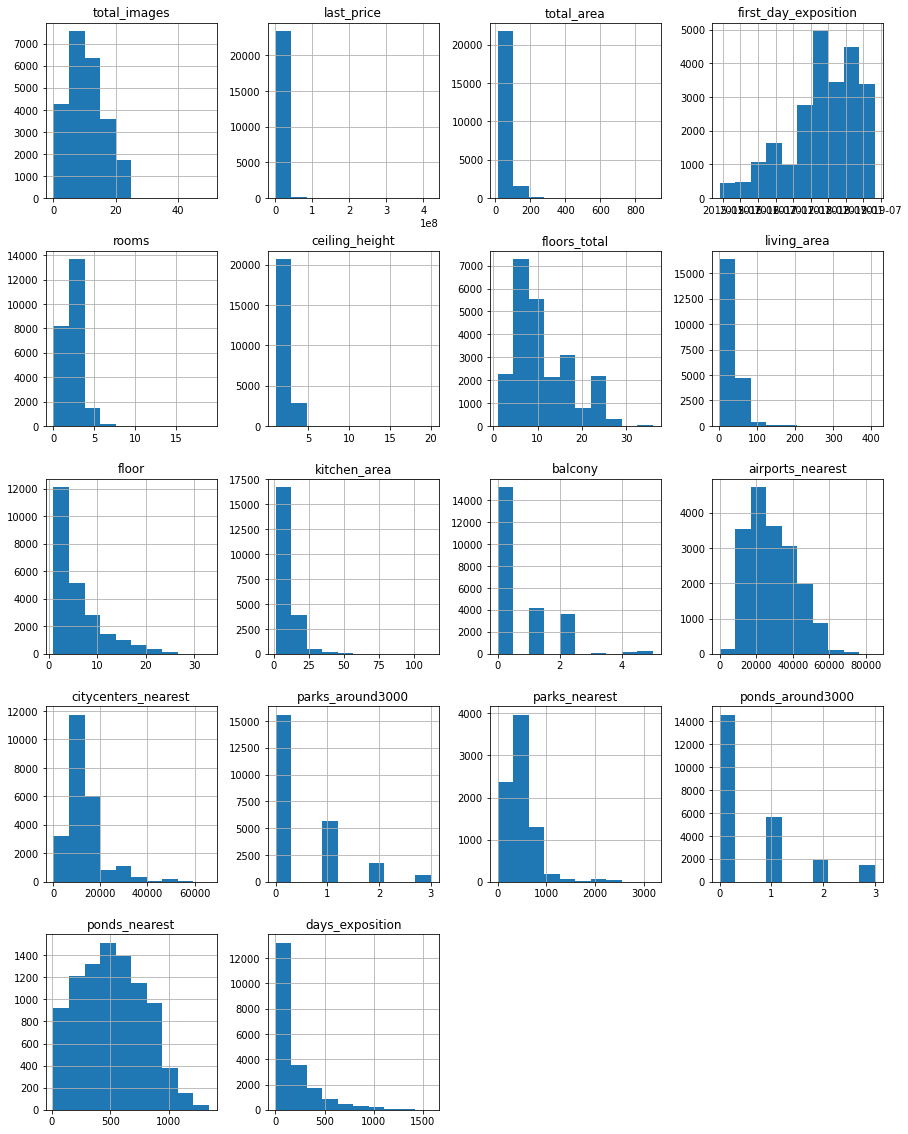

In [42]:
display(data.info()) #смотрим инфо о датафрейме
display(data.head(15))
data.hist(figsize=(15, 20)) #строим общую гистограмму длявсех числовых столбцов
display(data.describe()) #формируем описание данных датафрейма

Объем информации достаточно большой, всего 23 столбца с данными. В процессе предобработки постарались проверить и обработать основные, которые понадобятся для анализа данных и ответа на поставленные задачи.

### Посчитайте и добавьте в таблицу новые столбцы

In [43]:
data['meter_price'] = data['last_price']/data['total_area'] #добавим столбец с информацией о стоимости квадратного метра
display(data['meter_price'].describe()) #сформируем описание столбца

count    2.360800e+04
mean     9.932564e+04
std      4.896476e+04
min      7.962963e+03
25%      7.656250e+04
50%      9.500000e+04
75%      1.142061e+05
max      1.736842e+06
Name: meter_price, dtype: float64

In [44]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #добавим столбец день недели
data['month_exposition'] = data['first_day_exposition'].dt.month #добавим столбец месяц
data['year_exposition'] = data['first_day_exposition'].dt.year #добавим столбец год
display(data.head()) #выведем первые несколько строк для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category,meter_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1,482.0,2,755.0,NaN,Апартаменты,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0,NaN,0,NaN,81.0,Апартаменты,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1,90.0,2,574.0,558.0,Апартаменты,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,2,84.0,3,234.0,424.0,Апартаменты,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2,112.0,1,48.0,121.0,Апартаменты,100000.000000,1,6,2018


Заполним пропуски в колонке со сроком объявления

In [45]:
for d in data['year_exposition'].unique():
    data.loc[(data['year_exposition'] == d) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['year_exposition'] == d), 'days_exposition'].median() #заполним пропуски в колонке со сроком объявления медианным значением исходя из года объявления

In [46]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый' #добавим столбец с типом этажа, то, что равно 1, имеет значение "первый"
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний' #то, что равно этажности дома, имеет значение "последний"
data['floor_type'] = data['floor_type'].fillna('другой') #все остальные пустые значение назовем "другой"

In [47]:
display(data.head()) #выведем первые 5 трок датафрейма для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,real_estate_category,meter_price,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2,755.0,23.0,Апартаменты,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0,NaN,81.0,Апартаменты,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2,574.0,558.0,Апартаменты,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,84.0,3,234.0,424.0,Апартаменты,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1,48.0,121.0,Апартаменты,100000.000000,1,6,2018,другой


<AxesSubplot:>

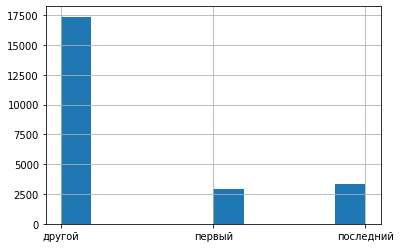

In [48]:
data['floor_type'].hist() #посмотрим на графике соотношение типов этажей по отношению к друг другу

In [49]:
data['citycenters_nearest'] = data['citycenters_nearest']/1000 #заменим растояние до центра города на километры
data['citycenters_nearest'] = data['citycenters_nearest'].round(0) #округлим значения до целых
display(data['citycenters_nearest'].head()) #сформируем первые 5 значений для перепроверки

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: citycenters_nearest, dtype: float64

В данном блоке проекта мы добавили информацию со стоимостью одногот квадратного метра, днем недели, месяцем и годом даты объявления, типом этажа, на котором расположена квартира, а также перевели расстояние до центра в городе в километры.

### Проведите исследовательский анализ данных

Анализ общей площади жилья, жилой площади и площади кухни

In [50]:
display(data['total_area'].describe()) #посмотрим описание столбца с общей площадью

count    23608.000000
mean        60.326582
std         35.582124
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

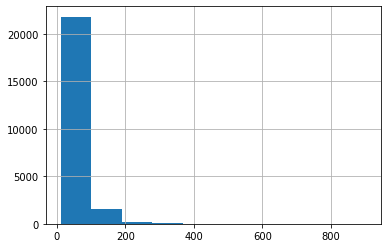

In [51]:
data['total_area'].hist() #построим гистограмму по столбцу с общей стоимостью жилья

Видим, что бОльшая часть жилья составляет недвижимость с общей площадью приблизительно от 20 до 70 метров

Посмотрим зависимость общей площади жилья от стоимости

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от площади жилья'}, xlabel='last_price', ylabel='total_area'>

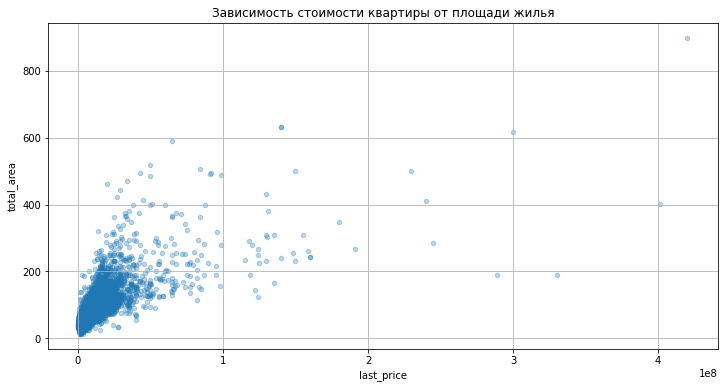

In [52]:
data.plot(x='last_price', y='total_area', title='Зависимость стоимости квартиры от площади жилья', kind='scatter', alpha=0.3, grid=True, figsize=(12, 6))

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от жилой площади'}, xlabel='last_price', ylabel='living_area'>

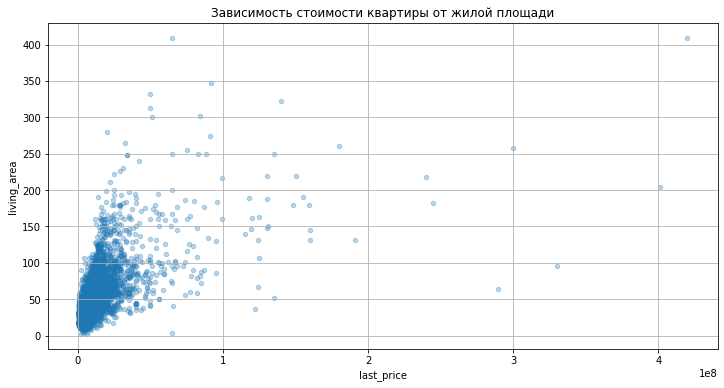

In [53]:
data.plot(x='last_price', y='living_area', title='Зависимость стоимости квартиры от жилой площади', kind='scatter', alpha=0.3, grid=True, figsize=(12, 6))

Исходя из данных графиков видим положительную корреляцию между стоимостью жилья и общей/жилой площадью квартиры.
Видим наличие данной зависимости, т.е. для большей части жилья стоимость напрямую зависит от общей и жилой площади. 


In [54]:
data['living_and_total'] = data['living_area']/data['total_area'] #посчитаем отношение жилой площади к общей площади жилья
data['kitchen_and_total'] = data['kitchen_area']/data['total_area'] #посчитаем отношение площади кухни к общей площади жилья

count    21738.000000
mean         0.564976
std          0.105265
min          0.021583
25%          0.495633
50%          0.568210
75%          0.637992
max          1.000000
Name: living_and_total, dtype: float64

<AxesSubplot:>

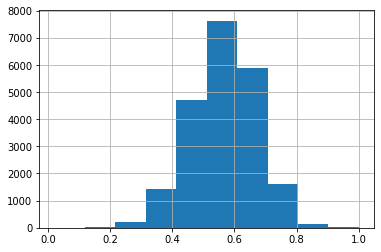

In [55]:
display(data['living_and_total'].describe()) #посмотрим информацию о стобце с соотношением жилой площади к общей
data['living_and_total'].hist() #построим гистограмму данного столбца

В большинстве случаев жилая часть составляет от 50% до 60% от общей площади.

count    21378.000000
mean         0.187308
std          0.072963
min          0.025381
25%          0.133333
50%          0.172334
75%          0.232416
max          0.787879
Name: kitchen_and_total, dtype: float64

<AxesSubplot:>

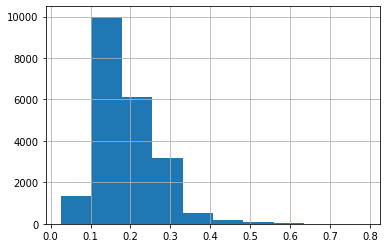

In [56]:
display(data['kitchen_and_total'].describe()) #посмотрим информацию о столбце с соотношением площади кухни к общей площади
data['kitchen_and_total'].hist() #построим гистограмму данного столбца

В большинстве случаев площадь кухни составляет примерно 10%-18% от общей площади жилья.

Анализ стоимости объекта

<AxesSubplot:>

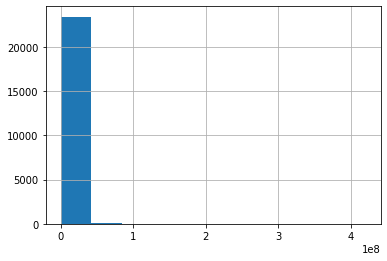

In [57]:
data['last_price'].hist() #построим гистограмму столбца со стоимостью жилья

<AxesSubplot:>

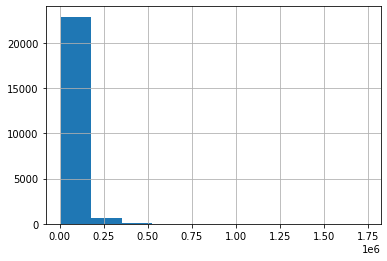

In [58]:
data['meter_price'].hist() #построим гистограмму столбца со стоимость квадратного метра

Построим гистограмму по столбцу со стоимостью жилья и стоимостью квадратного метра.
Сложно сделать какие-то выводы, оставим пока так.

In [59]:
data_pivot = data.pivot_table(index='rooms', columns='real_estate_category', values='last_price', aggfunc='median') #построим сводную таблицу в разрезе комнат и стоимости жилья
display(data_pivot)

real_estate_category,Апартаменты,Люкс,Стандартное жилье
rooms,,,
0,2740000.0,NaN,2135000.0
1,3600000.0,NaN,3590000.0
2,4780000.0,55800000.0,4700000.0
3,6200000.0,40000000.0,6012500.0
4,8990000.0,59922396.0,9350000.0
5,14000000.0,86738800.0,12500000.0
6,19250000.0,NaN,15175000.0
7,25000000.0,NaN,18000000.0
8,23095000.0,NaN,NaN


<AxesSubplot:xlabel='rooms'>

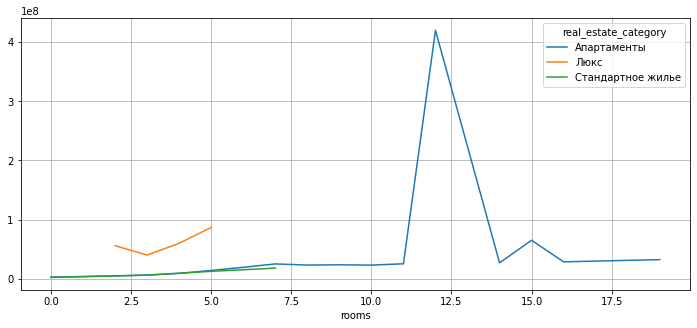

In [60]:
data_pivot.plot(grid=True, figsize=(12,5)) #выведем график построенной сводной таблицы

Построили сводную таблицу с информацией о средней стоимости жилья, количестве комнат и категории жилья.
Здесь мы видим зависимость средней стоимости жилья (рассчитанной с помощью медианы) от количества комнат в разрезе выделенных категорий недвижимости.
Видим, что в целом жилье категории люкс на порядок дороже обычного, также видим анамальное значение стоимости жилья апартаментов на количестве 12 комнат. Возможно, эта недвижимость находится в элитном доме, центре города либо с хорошим ремонтом.

In [61]:
pd.qcut(data['total_area'], 4)
data['total_area_category'] = pd.qcut(data['total_area'], 4)
data_pivot_area = data.pivot_table(index='total_area_category', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_area) #сформируем сводную таблицу в разрезе категории жилья и общей площади с информацией о средней стоимости

real_estate_category,Апартаменты,Люкс,Стандартное жилье
total_area_category,,,
"(11.999, 40.0]",3300000.0,NaN,3300000.0
"(40.0, 52.0]",4100000.0,NaN,4035000.0
"(52.0, 69.8]",5300000.0,NaN,5250000.0
"(69.8, 900.0]",9200000.0,49734450.0,8500000.0


<AxesSubplot:xlabel='total_area_category'>

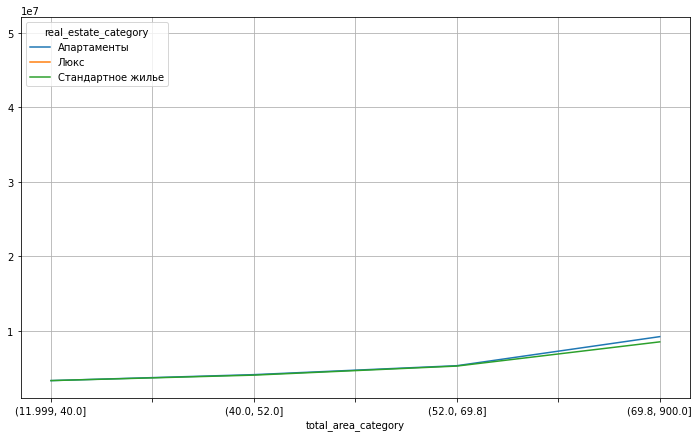

In [62]:
data_pivot_area.plot(grid=True, figsize=(12,7)) #построим график на основании данной таблицы

Здесь мы проверили зависимость стоимости жилья от площади. Видим логичную зависимость: чем больше общая площадь жилья, тем выше его стоимость.

In [63]:
pd.qcut(data['days_exposition'], 4)
data['days_exposition_category'] = pd.qcut(data['days_exposition'], 4)
data_pivot_days = data.pivot_table(index='days_exposition_category', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_days) #построим сводную  таблицу с информацией о средней стоимости в разрезе категорий жилья и срока размещения объявления

real_estate_category,Апартаменты,Люкс,Стандартное жилье
days_exposition_category,,,
"(0.999, 35.0]",4600000.0,35207600.0,4500000.0
"(35.0, 80.0]",4400000.0,79645000.0,4250000.0
"(80.0, 204.0]",4700000.0,38000950.0,4650000.0
"(204.0, 1580.0]",4885000.0,59922396.0,5200000.0


<AxesSubplot:xlabel='days_exposition_category'>

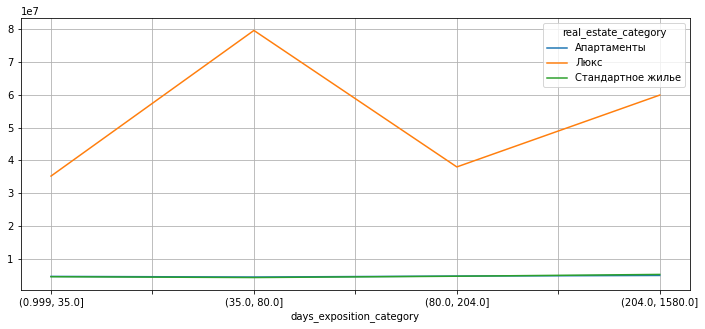

In [64]:
data_pivot_days.plot(grid=True, figsize=(12,5)) #построим график на основании сводной таблицы

В этом блоке мы проверяем зависимость стоимости жилья от количества дней размещения объявления.
Видим, что стоимость недвижимости Люкс из новых объявлений значительно дороже, чем 1,5-3 месяца назад. Но также видим, что и недвижимость из объявлений от 3 до 8 месяцев дороже, че недвижимость из объявлений сроком 1,5-3 мес.

In [65]:
data_pivot_month = data.pivot_table(index='year_exposition', columns='month_exposition', values='last_price', aggfunc='median')
display(data_pivot_month) #построим сводную таблицу с информацией о средней стоимости жилья в зависимости от года и месяца объявления

month_exposition,1,2,3,4,5,6,7,8,9,10,11,12
year_exposition,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13280560.0,7300000.0
2015,7425000.0,5570000.0,5607710.0,5215000.0,5100000.0,4950000.0,5400000.0,5550000.0,6210726.5,5029500.0,5170000.0,4880000.0
2016,5050000.0,4625000.0,4550000.0,4550000.0,4325000.0,4515000.0,4400000.0,4070000.0,4800000.0,5000000.0,4450000.0,4625000.0
2017,4580000.0,4750000.0,4500000.0,4650000.0,4500000.0,4225000.0,4500000.0,4500000.0,4650000.0,4300000.0,4500000.0,4400000.0
2018,4300000.0,4350000.0,4250000.0,4500000.0,4650000.0,4400000.0,4715000.0,4600006.0,4650000.0,4700000.0,4800000.0,5100000.0
2019,5000000.0,5200000.0,5000000.0,5040000.0,5250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year_exposition'>

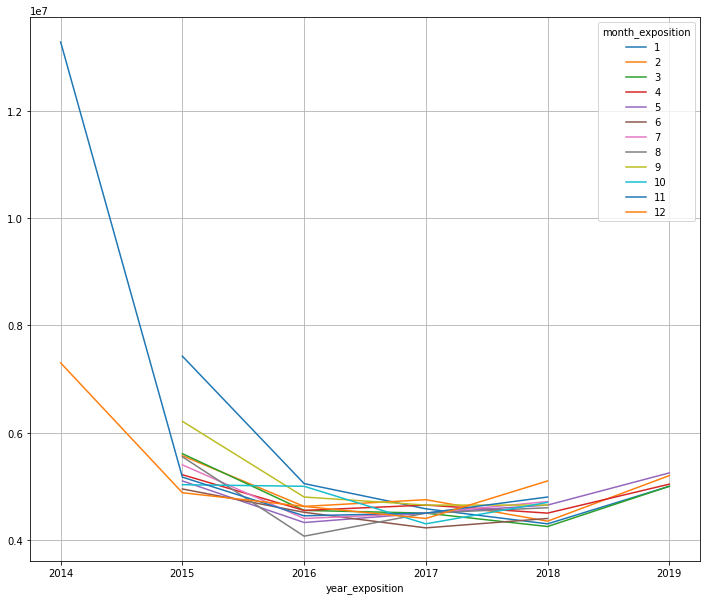

In [66]:
 data_pivot_month.plot(grid=True, figsize=(12,10)) #построим график

Сложно для восприятия, но оставим так.
Здесь мы видим сводную информацию о средней стоимости жилья в разрезе месяцев размещения объявления в тот или иной год.
Видим, что в 2015-2016 годах средняя стоимость недвижимости к концу года падала, в 2017 - держалась примерно на одном уровне, а в 2018 году - средняя стоимость недвижимости к концу года занчительно возросла по отношению к началу года.

Анализ количества комнат

<AxesSubplot:>

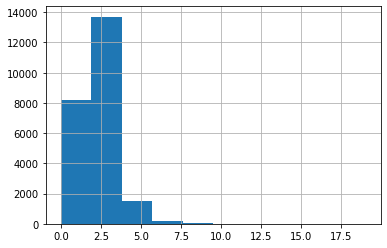

In [67]:
data['rooms'].hist() #построим гистограмму колонки с количеством комнат

Видим, что больше всего объявлений размещено с недвижимостью двух- и трех- комнатного жилья.
Меньше всего объявлений с недвижимостью от 7 до 9 комнат.

Далее построим сводную информацию по данному блоку.

In [68]:
data_pivot_rooms = data.pivot_table(index='rooms', columns='year_exposition', values='meter_price', aggfunc='median').round()
display(data_pivot_rooms) #построим сводную таблицу со средней стоимостью квадратного метра в зависимости от года объявления и количества комнат

year_exposition,2014,2015,2016,2017,2018,2019
rooms,,,,,,
0,NaN,81786.0,100207.0,103734.0,105058.0,116000.0
1,105507.0,100070.0,98485.0,97265.0,100528.0,112244.0
2,106496.0,91195.0,88965.0,89362.0,94186.0,101991.0
3,106071.0,88198.0,85499.0,87265.0,89247.0,95572.0
4,126437.0,96759.0,92667.0,91093.0,90657.0,98205.0
5,153571.0,101576.0,88433.0,95903.0,100000.0,95608.0
6,363940.0,99254.0,84728.0,99316.0,98845.0,119302.0
7,NaN,100000.0,127551.0,104243.0,119816.0,108537.0
8,NaN,75877.0,83340.0,111122.0,150213.0,NaN


<AxesSubplot:xlabel='rooms'>

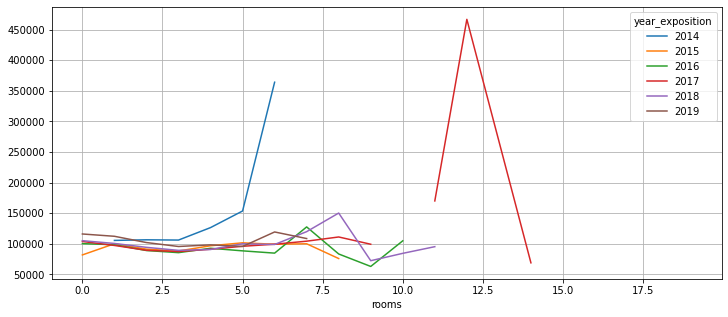

In [69]:
data_pivot_rooms.plot(grid=True, figsize=(12,5)) #сформируем график

Сформировали сводную информацию о средней стоимости квадратного метра в разрезе годов объявлений и количества комнат.
Видим, что средняя стоимость квадратного метра падала от 2014 г. к 2016 г. и затем возрастала от 2017 г. к 2019 г.
Но, например, недвижимость с количеством комнат от 2 до 6 к 2019 г. так и не достигла стоимости 2014 г.

Высота потолков

<AxesSubplot:>

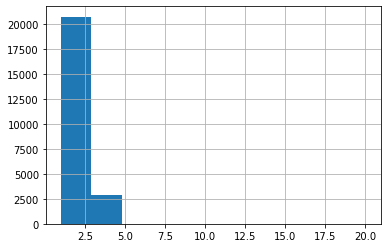

In [70]:
data['ceiling_height'].hist() #построим гистограмму по столбцу с высотой потолков

Видим, что большинство объявлений - это недвижимость с высотой потолка от 1 м. до 2,7 м.

Далее посмотрим сводную информацию о жилья в разрезе высоты потолков.

In [71]:
data_pivot_ceil = data.pivot_table(index='real_estate_category', values='ceiling_height', aggfunc='median')
display(data_pivot_ceil) #построим сводную таблицу со средней высотой потолков в разрезе категорий жилья

,ceiling_height
real_estate_category,
Апартаменты,2.650
Люкс,3.025
Стандартное жилье,2.700


<AxesSubplot:xlabel='real_estate_category'>

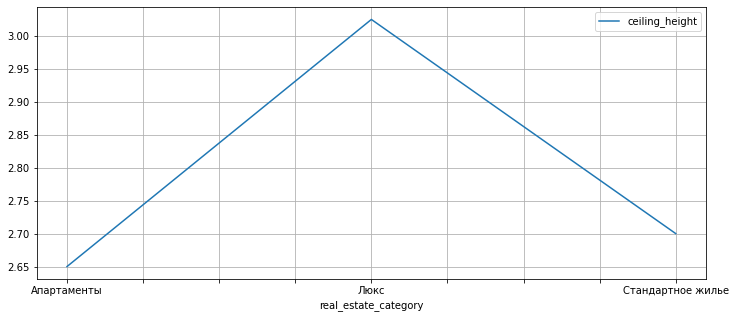

In [72]:
data_pivot_ceil.plot(grid=True, figsize=(12,5)) #построим график

In [73]:
pd.qcut(data['ceiling_height'], 4)
data['ceiling_height_category'] = pd.qcut(data['ceiling_height'], 4)
data_pivot_ceil = data.pivot_table(index='ceiling_height_category', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_ceil) #построим сводную таблицу с информацией о средней стоимости жилья в зависимости от категории и выоты потолков

real_estate_category,Апартаменты,Люкс,Стандартное жилье
ceiling_height_category,,,
"(0.999, 2.6]",3950000.0,NaN,3999000.0
"(2.6, 2.65]",4390000.0,NaN,4925000.0
"(2.65, 2.7]",4950000.0,NaN,4300000.0
"(2.7, 20.0]",7500000.0,49734450.0,6900000.0


<AxesSubplot:xlabel='ceiling_height_category'>

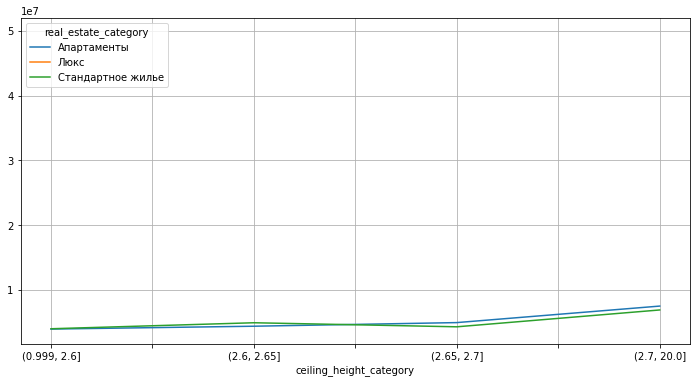

In [74]:
data_pivot_ceil.plot(grid=True, figsize=(12,6)) #посмотрим на графике

Видим, что в среднем в апартаментах высота потолков составляет 2,65 м., в стандартном жилье - 2,7 м., в жилье категории люкс - 3 м.
Также видим, что в более дорогом и престижном жилье потолки выше.

Этаж квартиры и тип этажа квартиры

<AxesSubplot:>

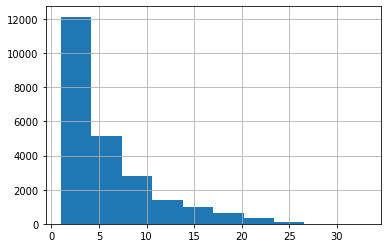

In [75]:
data['floor'].hist() #построим гистограмму по колонке с этажами, на которых размещена жилплощадь из объявлений

Видим, что чаще всего в объявлениях встречается недвижимость на этажах с 1 по 4, далее - с 4 по 7 и далее по убыванию. Меньше всего в объявлениях содержатся квартиры на 24-25 этажах.

<AxesSubplot:>

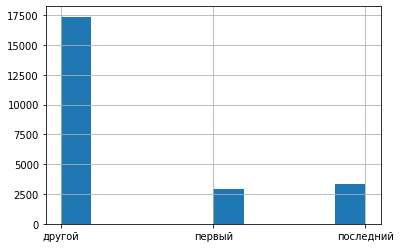

In [76]:
data['floor_type'].hist() #построим гистограмму с типом этажа

In [77]:
data_pivot_floor = data.pivot_table(index='floor_type', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_floor) #построим сводную таблицу со срдней стоимостью в разрезе категории жилья и типа этажа

real_estate_category,Апартаменты,Люкс,Стандартное жилье
floor_type,,,
другой,4800000.0,48600000.0,4900000.0
первый,3900000.0,49968900.0,3885000.0
последний,4300000.0,73884056.0,4395000.0


Видим, что в категории жилья апартаменты и стандартное средняя стоимость ниже для жилья, расположенного на первом этаже, и дороже всего на другом этаже (т.е. не первый и не последний).
Для категории жилья люкс средняя стоимость жилья значительно дороже на последнем этаже, дешевле всего на других этажах (не первый, не последний), и не намного дороже, чем на другом - на первом этаже.

Общее количество этажей в доме

<AxesSubplot:>

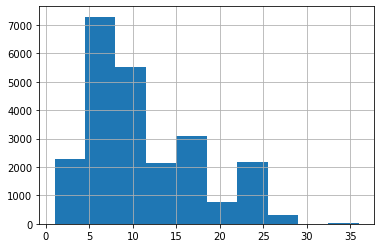

In [78]:
data['floors_total'].hist() #построим гистограмму по этажности домов

Видим, что больше всего домов с этажностью от 4 до 8, на втором месте от 8 до 12, меньше всего домов с этажностью от 25 до 28 и от 32 до 36.

In [79]:
pd.qcut(data['floors_total'], 4)
data['floors_total_category'] = pd.qcut(data['floors_total'], 4)
data_pivot_floors = data.pivot_table(index='floors_total_category', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_floors) #построим сводную таблицу с информацией о средней стоимости в разрезе категории жилья и этажности дома

real_estate_category,Апартаменты,Люкс,Стандартное жилье
floors_total_category,,,
"(0.999, 5.0]",3750000.0,67104950.0,3860000.0
"(5.0, 9.0]",4850000.0,55800000.0,4790000.0
"(9.0, 16.0]",5220000.0,37300950.0,5200000.0
"(16.0, 36.0]",5000000.0,35290000.0,5025000.0


<AxesSubplot:xlabel='floors_total_category'>

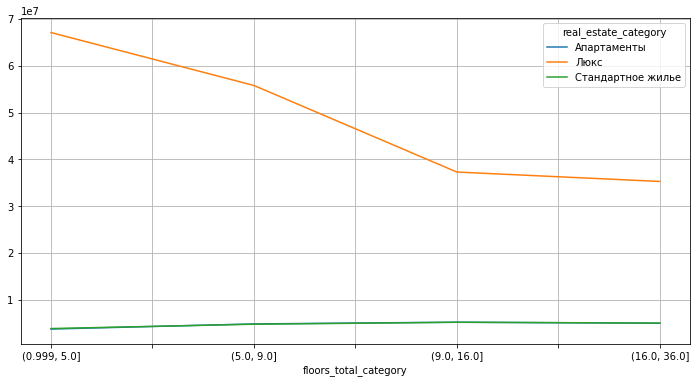

In [80]:
data_pivot_floors.plot(grid=True, figsize=(12,6)) #посмотрим на графике

Видим, что в категории апартаменты и стандартное жилье дороже всего недвижимость в домах с этажностью 9-16, а дешевле всего в домах с этажностью 1-5.
Недвижимость категории люкс, наоборот, дороже в этажности от 1 до 5 и от 6 до 9, и дешевле в домах с этажностью от 16 до 36 этажей.

Посмотрим зависимость этажности домов в зависимости от расположения по отношению к центру города.

In [81]:
pd.qcut(data['floors_total'], 4)
data['floors_total_category'] = pd.qcut(data['floors_total'], 4)
data_pivot_floors = data.pivot_table(index='floors_total_category', columns='real_estate_category', values='citycenters_nearest', aggfunc='median')
display(data_pivot_floors) #построим свод с информацией о расположении от центра в разрезе категории жилья и этажности дома

real_estate_category,Апартаменты,Люкс,Стандартное жилье
floors_total_category,,,
"(0.999, 5.0]",13.0,5.0,13.0
"(5.0, 9.0]",13.0,5.0,13.0
"(9.0, 16.0]",13.0,7.0,13.0
"(16.0, 36.0]",13.0,9.0,13.0


<AxesSubplot:xlabel='floor_type'>

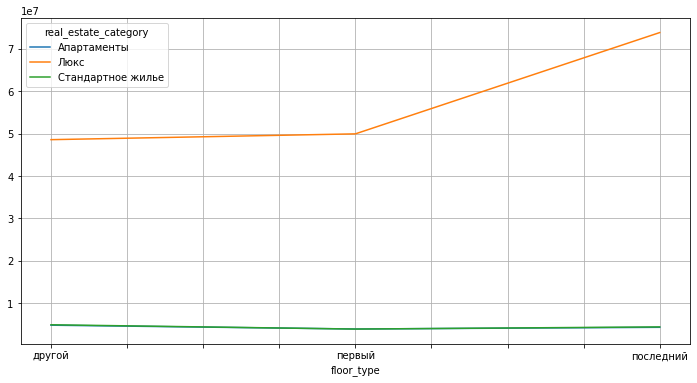

In [82]:
data_pivot_floor.plot(grid=True, figsize=(12,6)) #построим график

Видим, что жилье категории люкс ближе находится к центру с этажностью от 1 до 5 и от 5 до 9 (в среднем в районе 5 км).
В целом жилье категории люкс находится к центру ближе, чем стандартное и апартаменты, таким образом, можем сделать вывод, то категория жилья напрямую зависит от расположения по отношению к центру.
В стандартном жилье и апартаментах также есть зависмость этажности дома от его расположения: дома с бОльшей этажностью находятся дальше от центра, но в данных категориях разброс не такой значительный.

Расстояние до центра города в метрах

In [83]:
data['citycenters_nearest'] = data['citycenters_nearest']*1000 #вернем значения данной колонки из километров в метры

<AxesSubplot:>

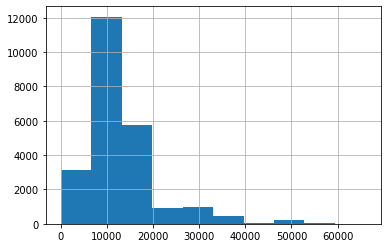

In [84]:
data['citycenters_nearest'].hist() #построим гистограмму расстояния недвижимости от центра города (значения в метрах)

Видим, что больше всего недвижимости из объявлений находится от центра в пределах 8 000 м - 12 000 м. На втором месте - от 12 000 м. до 20 000 м. Чуть больше 3 000 объявлений - это недвижимость, расположенная близко к центру в пределах 7 000 м.-8 000 м.

Также видим, что есть объявления с недвижимостью в пределах 40 000 м. - 60 000 м., а на расстоянии от 47 000 м. до 52 000 м. количество объектов недвижимости из объявлений даже увеличивается.

Выше мы уже проверили зависимость расположения и этажности домов.
Давайте посмотрим зависимость расположения от стоимости недвижимости, стоимости квадратного метра, а также от общей площади жилья.

In [85]:
pd.qcut(data['last_price'], 4)
data['last_price_category'] = pd.qcut(data['last_price'], 4)
data_pivot_city = data.pivot_table(index='last_price_category', columns='real_estate_category', values='citycenters_nearest', aggfunc='median')
display(data_pivot_city) #построим сводную таблицу с информацией о расположении от центра города (среднее значение в метрах) в зависимости от категории жилья и стоимости

real_estate_category,Апартаменты,Люкс,Стандартное жилье
last_price_category,,,
"(429999.999, 3400000.0]",13000.0,NaN,13000.0
"(3400000.0, 4650000.0]",13000.0,NaN,13000.0
"(4650000.0, 6799000.0]",13000.0,NaN,13000.0
"(6799000.0, 420000000.0]",9000.0,6000.0,9000.0


<AxesSubplot:xlabel='last_price_category'>

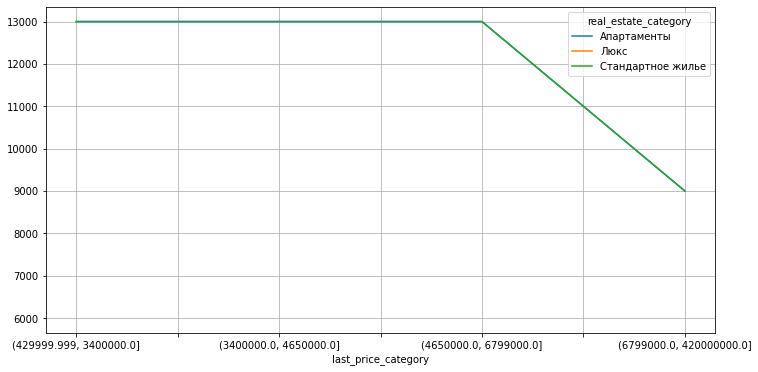

In [86]:
data_pivot_city.plot(grid=True, figsize=(12,6)) #построим график

Наблюдаем логичную закономерность - чем ближе недвижимость к центру города, тем она дороже.

In [87]:
pd.qcut(data['meter_price'], 4)
data['meter_price_category'] = pd.qcut(data['meter_price'], 4)
data_pivot_city = data.pivot_table(index='meter_price_category', columns='real_estate_category', values='citycenters_nearest', aggfunc='median')
display(data_pivot_city) #построим сводную таблицу с расстоянием от центра в разрезе категории жилья и стоимости квадраного метра

real_estate_category,Апартаменты,Люкс,Стандартное жилье
meter_price_category,,,
"(7962.9619999999995, 76562.5]",13000.0,NaN,13000.0
"(76562.5, 95000.0]",13000.0,NaN,13000.0
"(95000.0, 114206.128]",13000.0,NaN,13000.0
"(114206.128, 1736842.105]",11000.0,6000.0,11000.0


<AxesSubplot:xlabel='meter_price_category'>

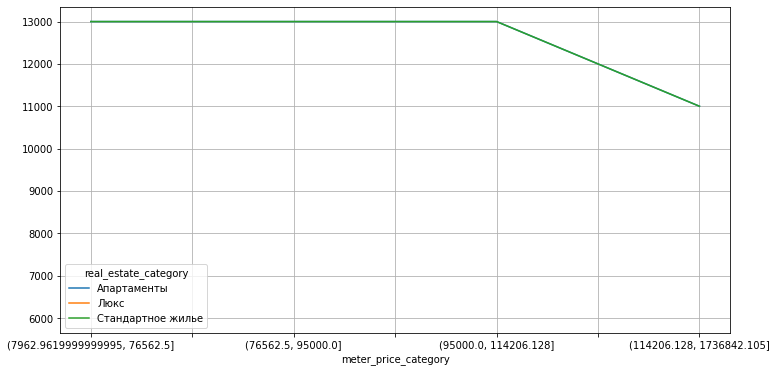

In [88]:
data_pivot_city.plot(grid=True, figsize=(12,6)) #посмотрим график

Аналогичный вывод - чем ближе недвижимость к центру города, тем дороже стоимость квадратного метра.

Также видим, что недвижимость категории люкс ближе всего находится к центру.

In [89]:
data_pivot_area = data.pivot_table(index='total_area_category', columns='real_estate_category', values='citycenters_nearest', aggfunc='median')
display(data_pivot_area) #построим свод с расстоянием от ценра в зависимоси от общей площади и категории жилья

real_estate_category,Апартаменты,Люкс,Стандартное жилье
total_area_category,,,
"(11.999, 40.0]",13000.0,NaN,13000.0
"(40.0, 52.0]",13000.0,NaN,13000.0
"(52.0, 69.8]",13000.0,NaN,13000.0
"(69.8, 900.0]",12000.0,6000.0,12000.0


Видим закономерность, что, чем больше общая площадь жилья, тем ближе к центру она находится.

Расстояние до ближайшего аэропорта

<AxesSubplot:>

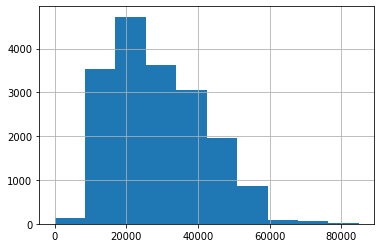

In [90]:
data['airports_nearest'].hist() #построим гистограмму с расстоянием до ближайшего аэропорта

Видим, что больше всего жилья из объявлений находятся в расстоянии от аэропорта от 19 км. до 25 км.
На втором месте (это примерно 3600 объявлений) - от 25 км. до 33 км.
На третьем месте (примерно 3500 объявлений) - от 8 кмю до 18 км.
Меньше всего недвижимости находится от 60 км. до 80 км. от аэропорта, а также рядом с аэропортом.

Сложно предположить, что аэропорт будет находиться где-то в центре города.
Давайте посмотрим зависимость стоимости жилья от расстояния до аэропорта.
Скорее всего, чем ближе жилье находится к аэропорту, тем оно дешевле.
Но и жилье, расположенное слишклм далеко от аэропорта, скорее всего, тоже не будет относиться к дорогостоящей категории недвижимости.
Давайте проверим гипотезу.

In [91]:
data['airports_nearest'] = data['airports_nearest']/1000 #переведем расстояние в километры
pd.qcut(data['airports_nearest'], 4)
data['airports_nearest_category'] = pd.qcut(data['airports_nearest'], 4)
data_pivot_airport = data.pivot_table(index='airports_nearest_category', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_airport) #построим свод с информацией о средней стоимости в зависимости от категории жилья и от расстояния до аэропорта

real_estate_category,Апартаменты,Люкс,Стандартное жилье
airports_nearest_category,,,
"(-0.001, 18.574]",4800000.0,42629450.0,4700000.0
"(18.574, 26.728]",6400000.0,59922396.0,6699000.0
"(26.728, 37.242]",5590000.0,37700000.0,5650000.0
"(37.242, 84.869]",4900000.0,NaN,4900000.0


<AxesSubplot:xlabel='airports_nearest_category'>

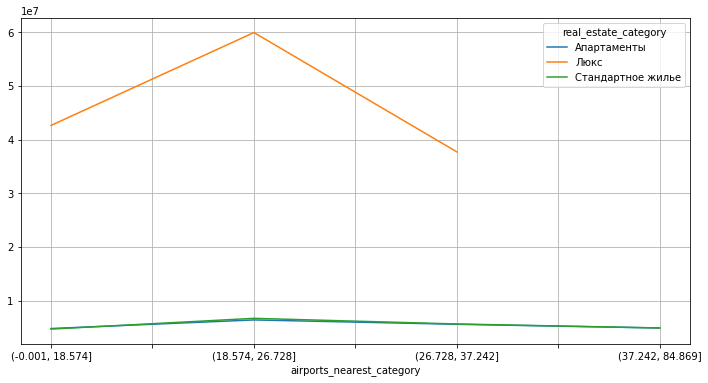

In [92]:
data_pivot_airport.plot(grid=True, figsize=(12,6)) #расстоянии до аэропортапосмотрим на графике

Гипотеза подтвердилась. Жилье, расположенное близко к аэропорту и далеко от аэропорта, стоит дешевле, чем жилье, которое относится к средней категории расположения от аэропорта.

Расстояние до ближайшего парка

<AxesSubplot:>

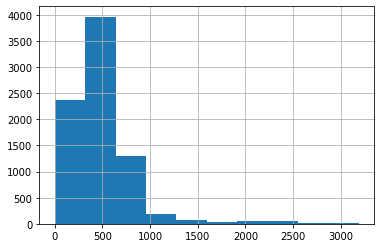

In [93]:
data['parks_nearest'].hist() #построим гистограмму с расстоянием до парков

Больше всего недвижимости из объявлений расположено в пределах 300 м.- 600 м. от парков.
Рядом с парками от 0 до 300 м. расположено около 2 300 недвижимости из объявлений.

Давайте посмотрим зависимость стоимости жилья от расположения его рядом с парком.

In [94]:
pd.qcut(data['parks_nearest'], 4)
data['parks_nearest_category'] = pd.qcut(data['parks_nearest'], 4)
data_pivot_park = data.pivot_table(index='parks_nearest_category', columns='real_estate_category', values='last_price', aggfunc='median')
display(data_pivot_park) #сделаем свод о стоимости жилья в зависимости от расстояния до парка и категории жилья

real_estate_category,Апартаменты,Люкс,Стандартное жилье
parks_nearest_category,,,
"(0.999, 288.0]",5990000.0,59534892.0,5900000.0
"(288.0, 455.0]",5840000.0,36001900.0,5690000.0
"(455.0, 612.0]",5750000.0,55800000.0,5390000.0
"(612.0, 3190.0]",5950000.0,31500000.0,6347400.0


Видим, что дороже всего недвижимость, расположенная дальше всего от парков (для всех трех выделенных категорий недвижимости). 
Далее, для категорий жилья апартаменты и стандартное жилье, видим, что на втором месте недвижимость, расположенная рядом с парками, и далее она дешевеет в зависимости от дальности расположения к парку.
С категорией жилья люкс менее понятно: на втором месте по стоимости жилье, расположенное близко к паркам, на третьем - от 450 м. до 612 м., и на последнем - от 288 м. до 455 м.

<AxesSubplot:>

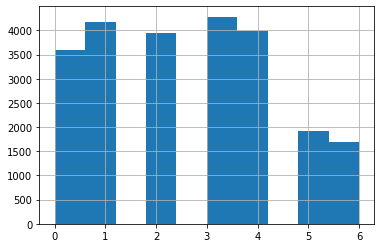

In [95]:
data['weekday_exposition'].hist() #построим гистограмму по дням недели, в которые размещены объявления

Видим, что больше всего объявлений размещается в первой половине недели (понедельник, вторник, среда, четверг)
Меньше всего объявлений размещается в пятницу и субботу.

<AxesSubplot:>

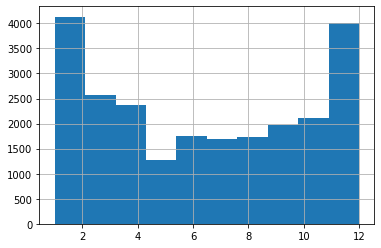

In [96]:
data['month_exposition'].hist()

Больше всего объявлений публикуется в январе-феврале и ноябре-декабре.

Итак, в данном разделе мы изучили ряд данных из датафрейма, а также их зависимость друг от друга (по большей части - от стоимости жилья).
Описали выводы по каждому из изученных показателей, по итогам которых общее понимание датафрейма стало более структурированным и визуализированным.

Изучим более подробно, как быстро продавались квартиры.

<AxesSubplot:>

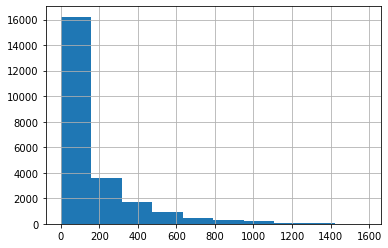

In [97]:
data['days_exposition'].hist() #построим гистограмму по срокам размещения объявления

Видим, что больше всего объявлений реализовано с 0 до приблизительно 180 дней (примерно 16 000 объявлений) - то есть это количество недвижимости продается в первые 180 дней со дня размещения объявления.
На втором месте - срок объявления примерно от 180 до 300 дней - это примерно 3800 объявлений (что в 4 раза меньше по сравнению с первой категорией)

Давайте посмотрим средний срок продажи жилья.

In [98]:
days_exposition_median = data.groupby('year_exposition')['days_exposition'].median()
display(days_exposition_median) #посмотрим средний срок размещения объявления в разрезе годов

year_exposition
2014    875.0
2015    575.5
2016    235.5
2017    103.0
2018     64.0
2019     23.0
Name: days_exposition, dtype: float64

In [99]:
days_exposition_median.describe()

count      6.000000
mean     312.666667
std      340.868547
min       23.000000
25%       73.750000
50%      169.250000
75%      490.500000
max      875.000000
Name: days_exposition, dtype: float64

Сформировали среднее значение по количеству дней объявления в разрезе годов объявления.
Видим, что в 2014 году средний срок объявления составлял 875 дней, с каждым годом он уменьшался, и в 2019 году составил 23 дня.
Что может влиять на срок объявления?
1. Спрос на рынке недвижимости
2. Платежеспособность покупателей
3. Качество объявлений, маркетинг и т.д.

Можем сделать вывод, что с каждым годом данные показаели улучшались.

Исходя из описания данных можем сделать вывод, что в среднем за полный период размещения объявлений, быстрый период продажи - 73 дня, слишком долгими - 490 дней.

Какие факторы больше всего влияют на стоимость недвижимости?

В предыдущих блоках практически по каждому изученному показателю мы проводили анализ зависимости от стоимости, закрепим все в данном блоке проекта.

Зависимость стоимости жилья от общей площади:

In [100]:
data_pivot_tot_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()
display(data_pivot_tot_area) #сформируем свод по стоимости жилья в разрезе его категории и общей площади

,total_area,last_price
0,12.0,2400000.0
1,13.0,1850000.0
2,13.2,1686000.0
3,14.0,1190000.0
4,15.0,1725000.0
...,...,...
2155,590.0,65000000.0
2156,618.0,300000000.0
2157,631.0,140000000.0
2158,631.2,140000000.0


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

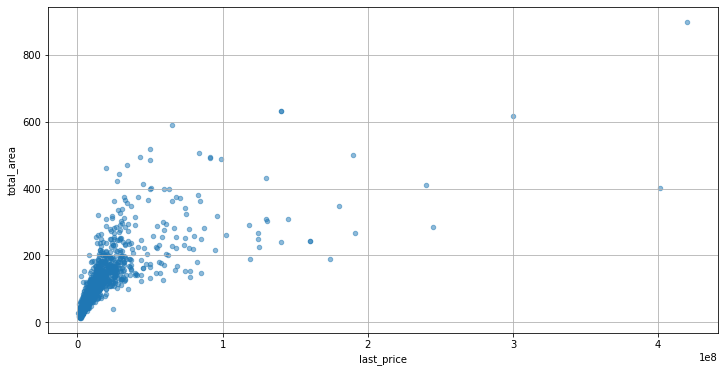

In [101]:
data_pivot_tot_area.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.5, figsize=(12,6))  #построим график

Видим прямую зависимость стоимости жилья от его площади: чем больше площадь жилья, тем оно дороже.
Помимо этого, видим и редкие исключения, когда площадь жилья остается на одном уровне, а стоимость возрастает. Скорее всего, в подобных ситуациях на стоимость будут влиять другие факторы, помимо площади.

Зависимость стоимости жилья от жилой площади:

In [102]:
data_pivot_liv_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()
display(data_pivot_liv_area) #построим свод с информацией о стоимости в разрезе жилой площади объекта

,living_area,last_price
0,2.0,4340000.0
1,3.0,34715000.0
2,5.0,2680000.0
3,5.4,6100000.0
4,6.0,3799000.0
...,...,...
1764,322.3,140000000.0
1765,332.0,50000000.0
1766,347.5,91500000.0
1767,409.0,65000000.0


<AxesSubplot:xlabel='last_price', ylabel='living_area'>

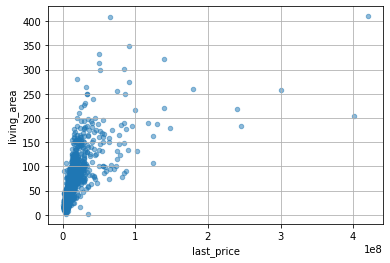

In [103]:
data_pivot_liv_area.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.5)

Видим прямую зависимость стоимости жилья от его жилой площади: чем больше жилая площадь, тем недвижимость дороже.
Но также видим и некоторые редкие разбросы стоимости: например, стоимость значительно выше при средней квадратуре жилой площади.

In [104]:
data_pivot_kitch_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()
display(data_pivot_kitch_area) #сформируем свод о средней стоимости жилья в разрезе категорий и площади кухни

,kitchen_area,last_price
0,1.30,4250000.0
1,2.00,2720000.0
2,2.30,2940000.0
3,2.40,2200000.0
4,2.89,5967734.0
...,...,...
959,93.20,82400000.0
960,100.00,65000000.0
961,100.70,12500000.0
962,107.00,85000000.0


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

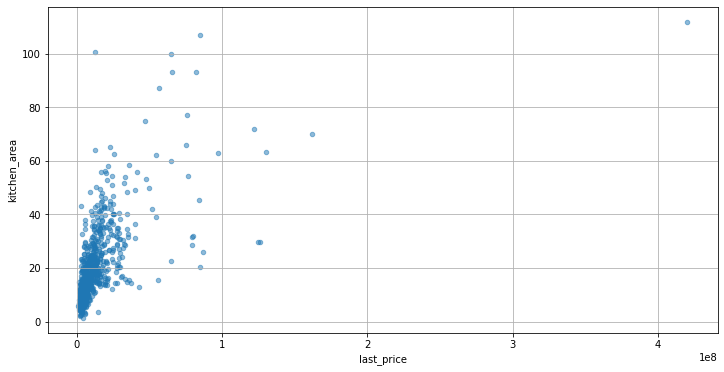

In [105]:
data_pivot_kitch_area.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.5, figsize=(12,6)) #построим график

Видим, что в целом зависимость от общей площади, жилой площади и площади кухни от стоимости жилья есть, что вполне логично.
Но также на каждом из графиков видим исключения, которые говорят о том, что есть и другие факторы, помимо площади, которые могут влиять на стоимость недвижимости.
Это может быть расположение, количество комнат, категория недвижимости и другое.

Зависимость стоимости жилья от количества комнат:

In [106]:
data_pivot_room = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
display(data_pivot_room) #сформируем свод о средней стоимости жилья в разрезе категорий и количества комнат

,rooms,last_price
0,0,2700000.0
1,1,3600000.0
2,2,4769000.0
3,3,6200000.0
4,4,9000000.0
5,5,14000000.0
6,6,19000000.0
7,7,24900000.0
8,8,23095000.0
9,9,23750000.0


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

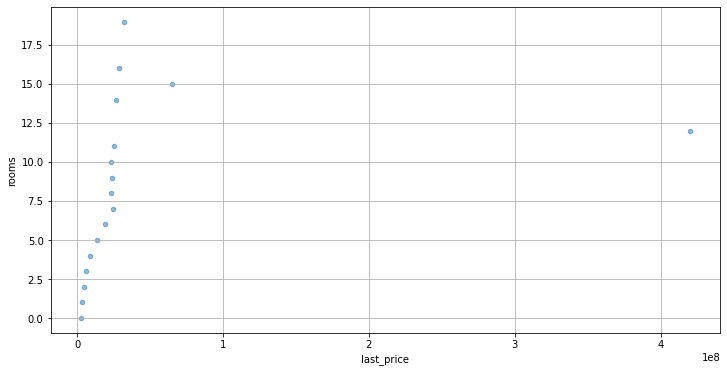

In [107]:
data_pivot_room.plot(x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.5, figsize=(12,6)) #построим график

Видим закономерный, но достаточно плавный рост стоимости недвижимости в зависимости от количества комнат.
Также видим уникальные аномальные значения с резким ростом стоимости, предположим, что это объявление премиальной недвижимости класса люкс.

Зависимость стоимости жилья от типа этажа:

In [108]:
data_pivot_floors_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
display(data_pivot_floors_type) #построим свод с информацией о средней стоимости жилья в зависимости от категории жилья и типа этажа

,floor_type,last_price
0,другой,4850000.0
1,первый,3900000.0
2,последний,4300000.0


<AxesSubplot:>

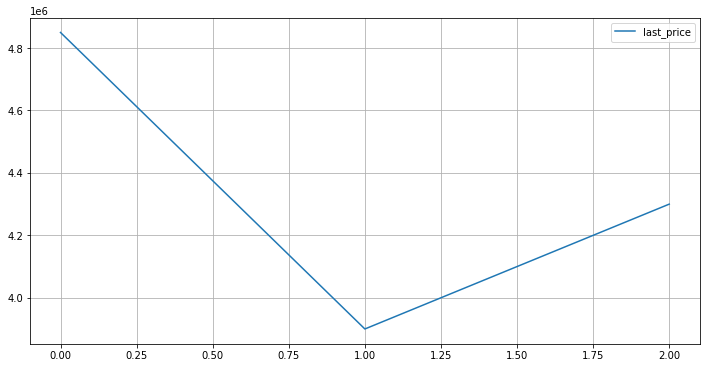

In [109]:
data_pivot_floors_type.plot(grid=True, figsize=(12,6)) #построим график

Видим, что жилье на первом этаже дешевле, чем на последнем и любом другом. Однако и на последнем этаже недвижимость дешевле.
Самым дорогостоящим будет жилье на другом (не первом и не последнем этаже).

Зависимость стоимости жилья от даты размещения:

День недели:

In [110]:
data_pivot_weekday = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').reset_index()
display(data_pivot_weekday) #посмотрим сводную информацию о средней стоимости жилья в зависимости от дня его размещения в разрезе категорий

,weekday_exposition,last_price
0,0,4650000.0
1,1,4730000.0
2,2,4700000.0
3,3,4650000.0
4,4,4577500.0
5,5,4550000.0
6,6,4540000.0


<AxesSubplot:xlabel='last_price', ylabel='weekday_exposition'>

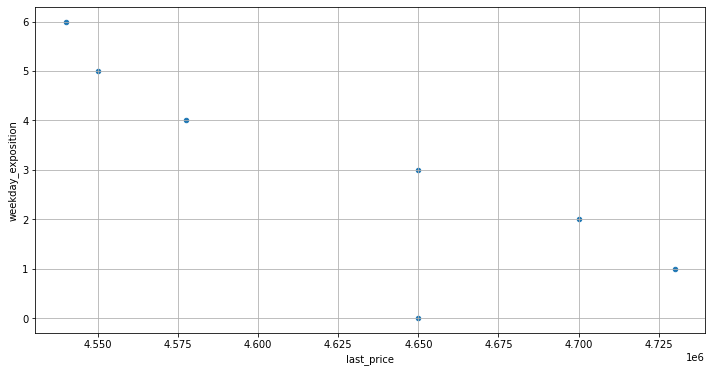

In [111]:
data_pivot_weekday.plot(x='last_price', y='weekday_exposition', kind='scatter', grid=True, figsize=(12,6)) #построим график

Видим разбросы стоимости в зависимости от дня недели размещения объявления. Например, жилье из объявлений, размещенных в конце недели, стоит дешевле, чем из объявлений, размещенных в начале и середине недели.

Месяц:

In [112]:
data_pivot_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index()
display(data_pivot_month) #построим свод о средней стоимости жилья в зависимости от месяца размещения в разрезе категорий

,month_exposition,last_price
0,1,4600000.0
1,2,4650000.0
2,3,4650000.0
3,4,4800000.0
4,5,4500000.0
5,6,4400000.0
6,7,4650000.0
7,8,4570000.0
8,9,4700000.0
9,10,4572500.0


<AxesSubplot:xlabel='last_price', ylabel='month_exposition'>

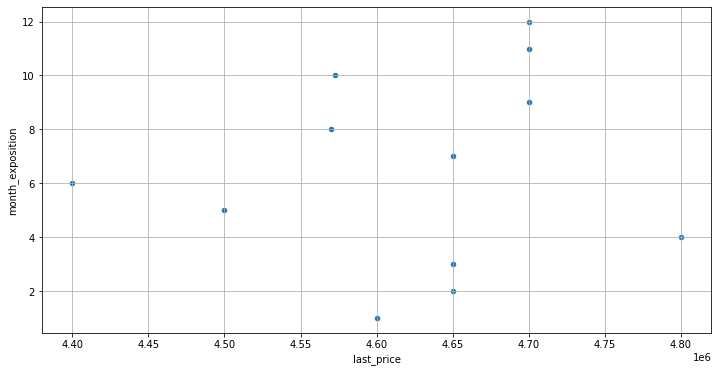

In [113]:
data_pivot_month.plot(x='last_price', y='month_exposition', kind='scatter', grid=True, figsize=(12,6)) #построим график

Сложно сделать вывод, не вижу какой-либо логической закономерности.

Год:

In [114]:
data_pivot_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index()
display(data_pivot_year) #построим свод о средней стоимости жилья в зависимости от года размещения и категории жилья

,year_exposition,last_price
0,2014,7700000.0
1,2015,5312500.0
2,2016,4550000.0
3,2017,4500000.0
4,2018,4555000.0
5,2019,5050000.0


<AxesSubplot:xlabel='last_price', ylabel='year_exposition'>

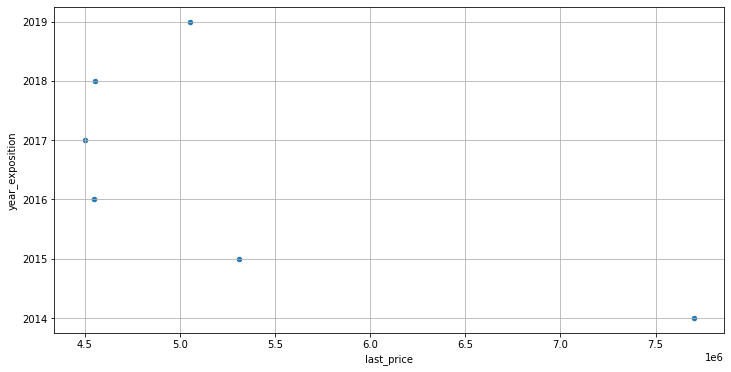

In [115]:
data_pivot_year.plot(x='last_price', y='year_exposition', kind='scatter', grid=True, figsize=(12,6))

Видим, что самая дорогая недвижимость была в 2014 г.
Затем в 2015 г. проищошел резкий спад стоимости, который продолжился в 2016-2017 годах, и лишь в 2018 году проищошел незначительный рост за 3 года.
Видим, что в 2019 году рост стоимости жилья уже значительно увеличился.
Можем связать высокую стоимость недвижимости в 2014 году с экономической ситуацией, которая возникла в то время.

Исправила графики и убрала категории, скорректировала выводы.

Рассмотрим стоимость квадратного метра жилья в разрезе населенных пунктов.

In [116]:
data_1 = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10) #Сформируем список населенных пунктов с самым большим количеством объявлений
display(data_1) #выведем на экран

locality_name
санкт-петербург    15695
мурино               586
кудрово              470
шушары               439
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: last_price, dtype: int64

In [117]:
data_2 = data.query('locality_name in ["санкт-петербург", "мурино", "кудрово", "шушары", "всеволожск", "пушкин", "колпино", "парголово", "гатчина", "выборг"]')
display(data_2.head()) 
#сделали срез датафрейма с населенными пунктами, по которым размещено больше всего объявлений, вывели первые 5 строк на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_and_total,kitchen_and_total,total_area_category,days_exposition_category,ceiling_height_category,floors_total_category,last_price_category,meter_price_category,airports_nearest_category,parks_nearest_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.472222,0.231481,"(69.8, 900.0]","(0.999, 35.0]","(2.65, 2.7]","(9.0, 16.0]","(6799000.0, 420000000.0]","(114206.128, 1736842.105]","(18.574, 26.728]","(455.0, 612.0]"
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.460396,0.272277,"(40.0, 52.0]","(80.0, 204.0]","(2.6, 2.65]","(9.0, 16.0]","(429999.999, 3400000.0]","(76562.5, 95000.0]","(-0.001, 18.574]",NaN
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0.612500,0.148214,"(52.0, 69.8]","(204.0, 1580.0]","(2.6, 2.65]","(0.999, 5.0]","(4650000.0, 6799000.0]","(76562.5, 95000.0]","(18.574, 26.728]","(0.999, 288.0]"
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,NaN,NaN,"(69.8, 900.0]","(204.0, 1580.0]","(2.6, 2.65]","(9.0, 16.0]","(6799000.0, 420000000.0]","(114206.128, 1736842.105]","(26.728, 37.242]","(0.999, 288.0]"
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.320000,0.410000,"(69.8, 900.0]","(80.0, 204.0]","(2.7, 20.0]","(9.0, 16.0]","(6799000.0, 420000000.0]","(95000.0, 114206.128]","(26.728, 37.242]","(0.999, 288.0]"


In [118]:
data_pivot_meter_price = data_2.pivot_table(index='locality_name', values='meter_price', aggfunc='median').sort_values(by='meter_price', ascending=False).round()
display(data_pivot_meter_price)
#сформировали сводную таблицу со средней стоимостью квадратного метра по каждому из этих населенных пунктов (по убыванию)

,meter_price
locality_name,
санкт-петербург,104750.0
пушкин,100000.0
кудрово,95555.0
парголово,91643.0
мурино,86250.0
шушары,76829.0
колпино,74724.0
гатчина,67797.0
всеволожск,65789.0


<AxesSubplot:xlabel='locality_name'>

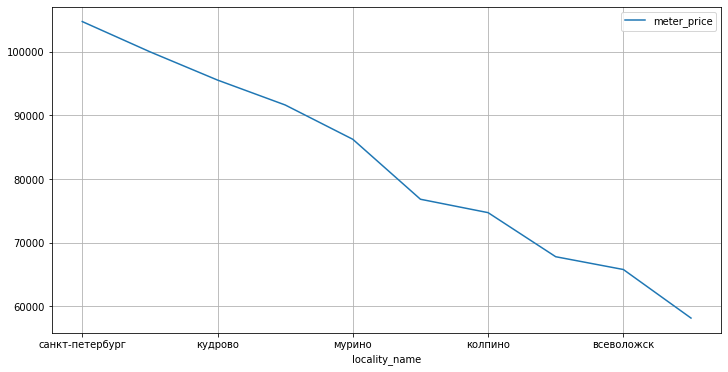

In [119]:
data_pivot_meter_price.plot(grid=True, figsize=(12,6)) #построим график

Исходя из данной таблицы также видим населенный пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, и населенный пункт с самой низкой стоимостью квадратного метра - Выборг.

Рассмотрим квартиры в Санкт-Петербурге и вычислим среднюю стоимость километра.

In [120]:
data['citycenters_nearest'] = data['citycenters_nearest']/1000 #вернем значение обратно в километры
data_spb = data.loc[data['locality_name'] == 'санкт-петербург'] #сформируем датафрейм с населенным пунктом Санкт-Петерург
display(data_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_and_total,kitchen_and_total,total_area_category,days_exposition_category,ceiling_height_category,floors_total_category,last_price_category,meter_price_category,airports_nearest_category,parks_nearest_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.472222,0.231481,"(69.8, 900.0]","(0.999, 35.0]","(2.65, 2.7]","(9.0, 16.0]","(6799000.0, 420000000.0]","(114206.128, 1736842.105]","(18.574, 26.728]","(455.0, 612.0]"
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0.612500,0.148214,"(52.0, 69.8]","(204.0, 1580.0]","(2.6, 2.65]","(0.999, 5.0]","(4650000.0, 6799000.0]","(76562.5, 95000.0]","(18.574, 26.728]","(0.999, 288.0]"
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,NaN,NaN,"(69.8, 900.0]","(204.0, 1580.0]","(2.6, 2.65]","(9.0, 16.0]","(6799000.0, 420000000.0]","(114206.128, 1736842.105]","(26.728, 37.242]","(0.999, 288.0]"
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.320000,0.410000,"(69.8, 900.0]","(80.0, 204.0]","(2.7, 20.0]","(9.0, 16.0]","(6799000.0, 420000000.0]","(95000.0, 114206.128]","(26.728, 37.242]","(0.999, 288.0]"
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,NaN,22,True,...,NaN,0.263966,"(69.8, 900.0]","(0.999, 35.0]","(2.6, 2.65]","(16.0, 36.0]","(6799000.0, 420000000.0]","(95000.0, 114206.128]","(18.574, 26.728]",NaN


In [121]:
data_pivot_spb = data_spb.pivot_table(index='citycenters_nearest', values='last_price', aggfunc='median') #сформируем сводную таблицу со срдней стоимостью жилья в зависимости от расстояния (в км) до центра города
display(data_pivot_spb) #выведем на экран

,last_price
citycenters_nearest,
0.0,17900000.0
1.0,11490000.0
2.0,10000000.0
3.0,8409000.0
4.0,9200000.0
5.0,9400000.0
6.0,8900000.0
7.0,7800000.0
8.0,7400000.0


In [122]:
data_pivot_spb_index = data_pivot_spb.reset_index() #отформатируем таблицу таким образом, чтобы столбцы были сформированы корректно на одном уровне
display(data_pivot_spb_index.head(1))

,citycenters_nearest,last_price
0,0.0,17900000.0


In [123]:
data_pivot_spb_index['km_price'] = data_pivot_spb_index['last_price']/data_pivot_spb_index['citycenters_nearest'] #добавим колонку с расчетом средней стоимости одного километра
display(data_pivot_spb_index.round()) #выведем рна экран, округлим значения

,citycenters_nearest,last_price,km_price
0,0.0,17900000.0,inf
1,1.0,11490000.0,11490000.0
2,2.0,10000000.0,5000000.0
3,3.0,8409000.0,2803000.0
4,4.0,9200000.0,2300000.0
5,5.0,9400000.0,1880000.0
6,6.0,8900000.0,1483333.0
7,7.0,7800000.0,1114286.0
8,8.0,7400000.0,925000.0
9,9.0,5300000.0,588889.0


<AxesSubplot:>

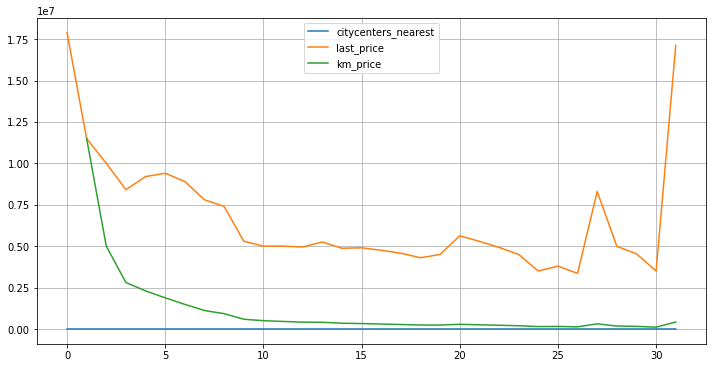

In [124]:
data_pivot_spb_index.plot(grid=True, figsize=(12,6)) #построим график

В данной таблице мы видим среднюю стоимость жилья в заисимости от расположения от центра города в километрах.
И также мы видим среднюю стоимость одного километра в зависимости от местонахождения жилья.
Видим, что расстояние напрямую влияет на стоимость жилья - стоимость квартир в центре значительно выше
Однако также наблюдаем, что нет прямой зависимости: чем дальше от центра расположена квартира, тем она дешевле. Например, средняя стоимость жилья, расположенного в 27 км от центра выше, чем стоимость жилья, расположенного в 16-17 км.
Значит, существуют более весомые факторы, влияющие на стоимость недвижимости.

### Общий вывод

Мы изучили и проанализировали датафрейм с объявлениями о продаже недвижимости в Санкт-Петербурге и близлежайших населенных пунктах за период с 2014 по 2019 год. 
В изученном материале представлены объявления с недвижимостью в различном ценовом диапазоне от 1 миллиона рублей до нескольких сотен миллионов рублей, с различной площадью от 12 м. до 900 м.

В процессе анализа выяснили основные факторы, влияющие на стоимость:
    1. Общая площадь, жилая площадь
    2. Количество комнат
    3. Расположение объекта по отношению к центру города
    4. Этаж и этажность дома
    5. Высота потолков
    6. Наличие парка рядом с объектом недвижимостью
    
Также по итогам анализа определили:
    1. Самый высокий уровень цен на недвижимость пришелся на 2014 год
    2. Как правило, жилье на первом и последнем этаже будет стоить дешевле, чем любой другой. Значит, у них есть свои определенные минусы.
    3. В недвижимости категории люкс, наоборот, последние этажи ценятся выше (предположим, что это может быть связано с эстетикой видов из окна или с дополнительными преимуществами в виду террас на крыше)
    4. Основные факторы, влияющие на стоимость недвижимости, это площадь и количество комнат
    5. Следующим по влиянию фактором является расположение от центра города (чем ближе к центру, тем жилье дороже)
    4. Самая высокая стоимость квадратного метра в разрезе населенных пунктов - в Санкт-Петербурге
    5. Чаще всего размещают объявления в конце и начале года
    
    

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод